In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('/covid.csv', sep=",")

In [3]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
#размер датасета
data.shape

(187, 15)

In [5]:
data.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [6]:
data.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [7]:
# Основные статистические характеристки набора данных
data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [16]:
data=data.drop(['WHO Region'], axis='columns')

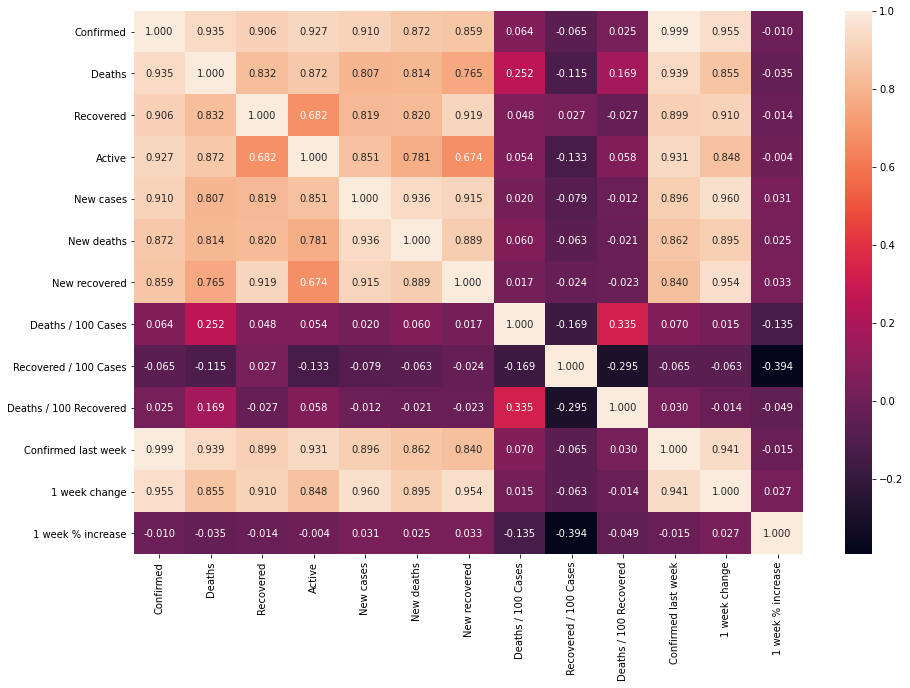

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.3f')

На основе полученной таблицы можно сделать вывод, что наиболее связанными являются пары показателей Confirmed и Confirmed last week, Deaths и Confirmed last week, Recovered и New recovered , Active и Confirmed last week, New cases и 1 week change, New deaths и 1 week change, New recovered и 1 week change, Deaths / 100 Cases и Deaths / 100 Recovered, Recovered / 100 Cases и Recovered, Deaths / 100 Recovered и Deaths,Confirmed last week и Confirmed,I week change и Confirmed,1 week % increase и Deaths.
То есть, можно отметить, что наибольшая связь наблюдается между обноружением Covid и заболевшие.

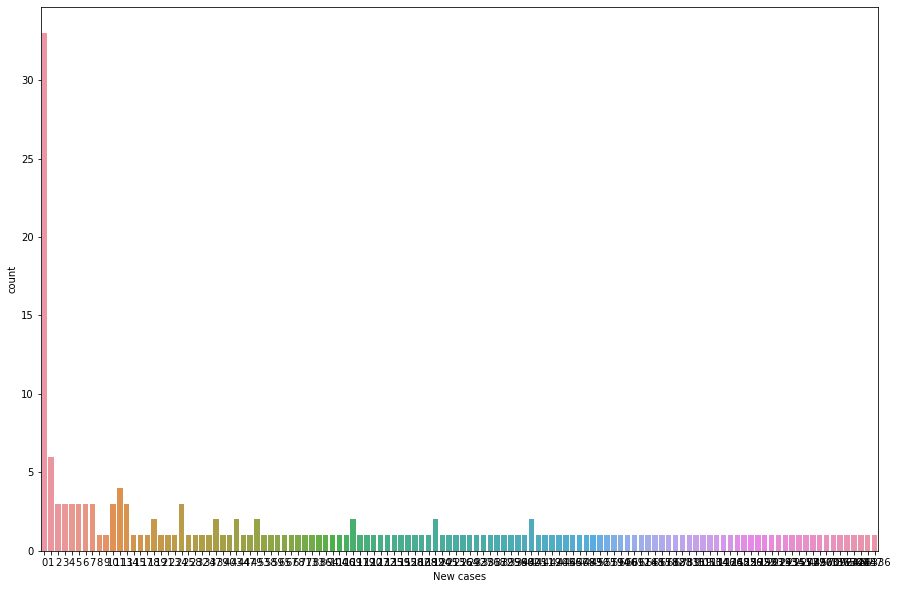

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x="New cases", data=data)


По этому графику можно понять, что самым распространённым методом обнаружения новых случай covid. Следующим по распространённости является метод активых случев covid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

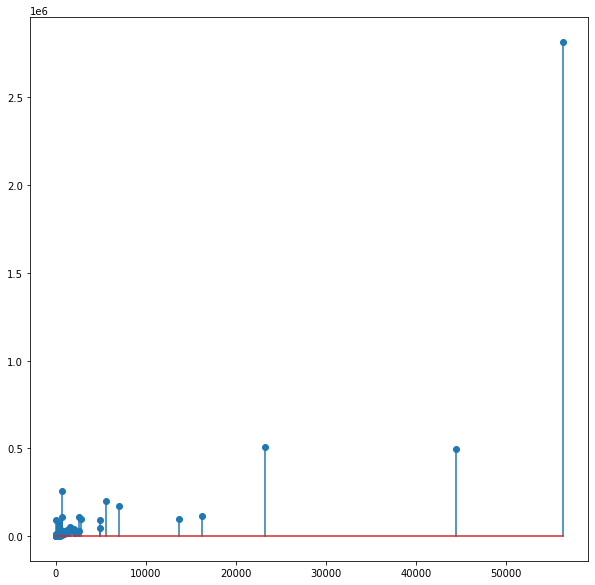

In [21]:
plt.figure(figsize=(10,10))
plt.stem(data['New cases'], data['Active'])

Связь между подтвержденным случаем и смерти

In [22]:
x=data['Confirmed']
y = data['Deaths']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

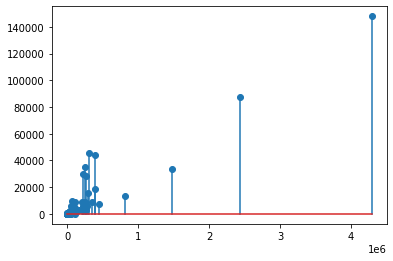

In [23]:
plt.stem(x, y)

Попытка визуализировать зависимость подтвержденности и смерти

Text(0.5, 1.0, 'Deaths')

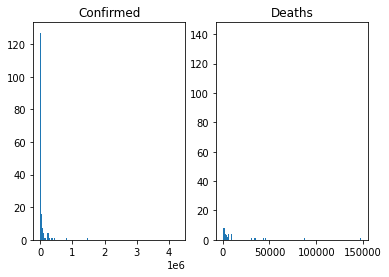

In [24]:
fig, axs=plt.subplots(1,2)
n=len(data)
axs[0].hist(data['Confirmed'], bins=n)
axs[0].set_title('Confirmed')
axs[1].hist(data['Deaths'], bins=n)
axs[1].set_title('Deaths')

На гистограмме показаны вылеченые от covid на 100 случай и смерти на 100 случай

<function matplotlib.pyplot.show>

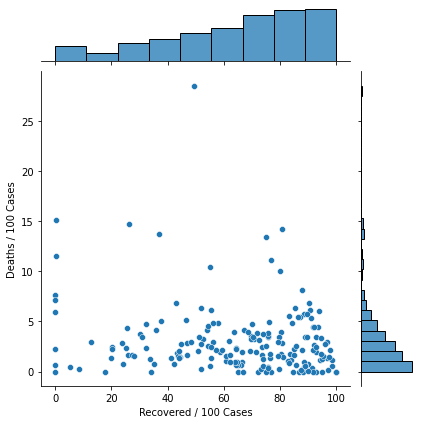

In [25]:
plot=sns.jointplot(x=data['Recovered / 100 Cases'], y=data['Deaths / 100 Cases'])
plt.show

Теперь взаимосвязь подтвержденых и новых случев

<function matplotlib.pyplot.show>

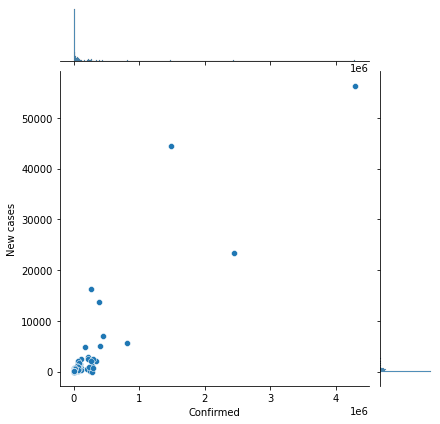

In [27]:
plot=sns.jointplot(x=data['Confirmed'], y=data['New cases'])
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


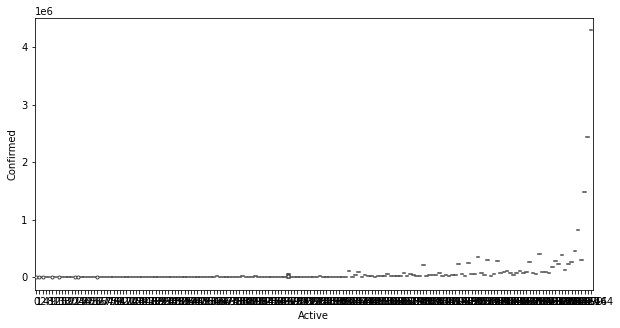

In [30]:
plt.figure(figsize=(10,5))
x=data['Active']

y=data['Confirmed']

sns.violinplot(x, y)


Зависимость активных и подтвержденных случаев

**Итоги** <br>
Были выделены наиболее связанные между собой характеристики – наиболее связанными оказались  обноружением Covid и заболевшие. <br>
Знание и изучение закономерностей между характеристиками заболеваемости covid может помочь людям бороться с болезнь и вылечить их. 
